# Vison based - Glass Bangle Defect Detection with Classification

## About Dataset

- This dataset has been downloaded from kaggle: https://www.kaggle.com/datasets/almique/glass-bangle-defect-detection-classification
- Here is the link to lincense: https://creativecommons.org/licenses/by-sa/4.0/

Note: We have already downloaded and decompressed the data in the same directory as notebook

### Dependencies

#### Before running this notebook, please make sure you have already installed the following libraries with correct versions.

- numpy==1.21.6
- opencv-python==4.7.0.72
- tensorflow==2.11.0
- scikit-learn==1.0.2
- google-cloud-aiplatform==1.24.1
- google-cloud-storage==2.9.0
- google-cloud-bigquery==2.34.4

## Importing useful libraries

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook
import tensorflow 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

2023-10-27 06:20:18.348364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 06:20:19.479588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-10-27 06:20:19.479726: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PAT

## Loading and Verifying data

In [2]:
good_bangle_paths = glob.glob("dataset/good/*.jpg")
defected_bangle_paths = glob.glob("dataset/defect/*.jpg")
broken_bangle_paths = glob.glob("dataset/broken/*.jpg")
print(len(good_bangle_paths), len(defected_bangle_paths), len(broken_bangle_paths))

520 244 316


### checking few sample images 

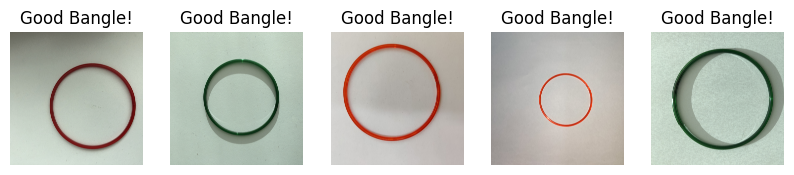

-----------------------------------------------------------------------------------------------------


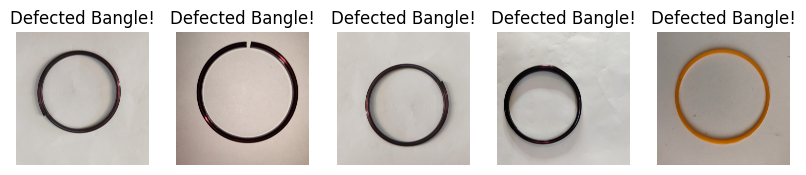

-----------------------------------------------------------------------------------------------------


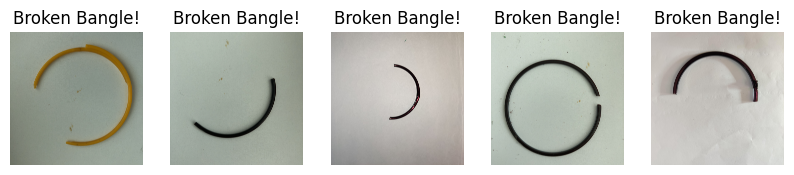

In [3]:
# checking few good bangle images
plt.figure(figsize=(10, 10))
for ix, img_path in enumerate(np.random.choice(good_bangle_paths, size=5)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(550 + 1 + ix)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Good Bangle!')
plt.show()
print("-"*101)

# checking few defected bangle images
plt.figure(figsize=(10, 10))
for ix, img_path in enumerate(np.random.choice(defected_bangle_paths, size=5)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(550 + 1 + ix)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Defected Bangle!')
plt.show()
print("-"*101)

# checking few broken bangle images
plt.figure(figsize=(10, 10))
for ix, img_path in enumerate(np.random.choice(broken_bangle_paths, size=5)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(550 + 1 + ix)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Broken Bangle!')
plt.show()

## Data Preparation

## We will perform the following steps for data prepraration:
- Read image
- Resize image to a fixed size (200 x 200)
- Convert image to gray scale (black-n-white)
- Convert them into numpy array

In [4]:
good_bangles = []
defected_bangles = []
broken_bangles = []

for img_path in tqdm_notebook(good_bangle_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (200, 200))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    good_bangles.append(img)
good_bangles = np.array(good_bangles)
good_bangles = np.expand_dims(good_bangles, axis=-1)

for img_path in tqdm_notebook(defected_bangle_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (200, 200))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    defected_bangles.append(img)
defected_bangles = np.array(defected_bangles)
defected_bangles = np.expand_dims(defected_bangles, axis=-1)
    
for img_path in tqdm_notebook(broken_bangle_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (200, 200))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    broken_bangles.append(img)
broken_bangles = np.array(broken_bangles)
broken_bangles = np.expand_dims(broken_bangles, axis=-1)

print(good_bangles.shape, defected_bangles.shape, broken_bangles.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/520 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/244 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/316 [00:00<?, ?it/s]

(520, 200, 200, 1) (244, 200, 200, 1) (316, 200, 200, 1)


## Splitting data into train and test

- we will consider first 75% images from each category as train images and rest 25% as test images.

In [5]:
good_bangles_train = good_bangles[:int(len(good_bangles)*0.75),]
good_bangles_test = good_bangles[int(len(good_bangles)*0.75):,]
defected_bangles_train = defected_bangles[:int(len(defected_bangles)*0.75),]
defected_bangles_test = defected_bangles[int(len(defected_bangles)*0.75):,]
broken_bangles_train = broken_bangles[:int(len(broken_bangles)*0.75),]
broken_bangles_test = broken_bangles[int(len(broken_bangles)*0.75):,]

print(good_bangles_train.shape, good_bangles_test.shape)

(390, 200, 200, 1) (130, 200, 200, 1)


## Combining images to single train and single test array

### Creating numberic labels as per the following rule:
- Good : 0
- Defected : 1
- Broken : 2

In [6]:
all_train_images = np.concatenate((good_bangles_train, defected_bangles_train, broken_bangles_train), axis=0)
all_train_labels = np.concatenate((
    np.array([0]*len(good_bangles_train)),
    np.array([1]*len(defected_bangles_train)),
    np.array([2]*len(broken_bangles_train))),
    axis=0
)
all_test_images = np.concatenate((good_bangles_test, defected_bangles_test, broken_bangles_test), axis=0)
all_test_labels = np.concatenate((
    np.array([0]*len(good_bangles_test)),
    np.array([1]*len(defected_bangles_test)),
    np.array([2]*len(broken_bangles_test))),
    axis=0
)
print(all_train_images.shape, all_train_labels.shape)
print(all_test_images.shape, all_test_labels.shape)

(810, 200, 200, 1) (810,)
(270, 200, 200, 1) (270,)


### shuffling images and labels in Unison

In [7]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

all_train_images, all_train_labels = unison_shuffled_copies(all_train_images, all_train_labels)
all_test_images, all_test_labels = unison_shuffled_copies(all_test_images, all_test_labels)

## Defining model architecture

#### Defining convolutional block with:
- One 2D Conv layers
- Batch Normalization layer
- ReLU Activation
- Max Pooling layer
- Dropouts

In [8]:
def convolution_block(data, filters, kernel, strides):
    data = tensorflow.keras.layers.Conv2D(
        filters=filters,
        kernel_size=kernel,
        strides=strides,
    )(data)
    data = tensorflow.keras.layers.BatchNormalization()(data)
    data = tensorflow.keras.layers.Activation('relu')(data)
    data = tensorflow.keras.layers.MaxPooling2D(strides=strides)(data)
    data = tensorflow.keras.layers.Dropout(0.2)(data)
    return data

### Defining model

In [9]:
input_data = tensorflow.keras.layers.Input(shape=(200, 200, 1))

data = input_data
data = convolution_block(data, filters=64, kernel=2, strides=2)
data = convolution_block(data, filters=128, kernel=2, strides=2)
data = convolution_block(data, filters=256, kernel=2, strides=2)
data = convolution_block(data, filters=256, kernel=2, strides=1)

data = tensorflow.keras.layers.Flatten()(data)
data = tensorflow.keras.layers.Dense(64)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dense(3)(data)
output_data = tensorflow.keras.layers.Activation('softmax')(data)

model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2023-09-07 14:31:38.841566: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-09-07 14:31:38.841630: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-07 14:31:38.841658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf-test-notebook): /proc/driver/nvidia/version does not exist
2023-09-07 14:31:38.842064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enabl

 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      320       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       32896     
          

## Compiling the Model Object

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training Model

In [11]:
history = model.fit(
    x=all_train_images,
    y=all_train_labels,
    batch_size=64,
    epochs=50,
    validation_data=(all_test_images, all_test_labels),
)

Epoch 1/50
13/13 [==============================] - 6s 311ms/step - loss: 1.1004 - accuracy: 0.5000 - val_loss: 7.9670 - val_accuracy: 0.2259
Epoch 2/50
13/13 [==============================] - 3s 260ms/step - loss: 0.8947 - accuracy: 0.5938 - val_loss: 11.9169 - val_accuracy: 0.2259
Epoch 3/50
13/13 [==============================] - 4s 310ms/step - loss: 0.7724 - accuracy: 0.6506 - val_loss: 7.3854 - val_accuracy: 0.2259
Epoch 4/50
13/13 [==============================] - 4s 308ms/step - loss: 0.7329 - accuracy: 0.6716 - val_loss: 3.9474 - val_accuracy: 0.2148
Epoch 5/50
13/13 [==============================] - 4s 322ms/step - loss: 0.6852 - accuracy: 0.7049 - val_loss: 3.8060 - val_accuracy: 0.2185
Epoch 6/50
13/13 [==============================] - 4s 324ms/step - loss: 0.6268 - accuracy: 0.7210 - val_loss: 2.8882 - val_accuracy: 0.3481
Epoch 7/50
13/13 [==============================] - 4s 298ms/step - loss: 0.6580 - accuracy: 0.7012 - val_loss: 2.2273 - val_accuracy: 0.3852
Epoch

## Plotting training progress

### loss chart

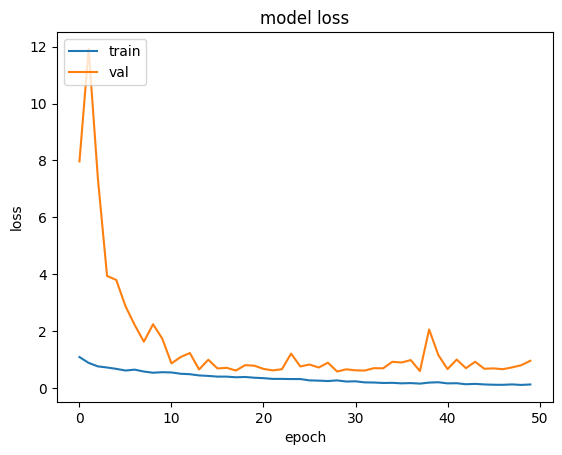

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### accuracy chart

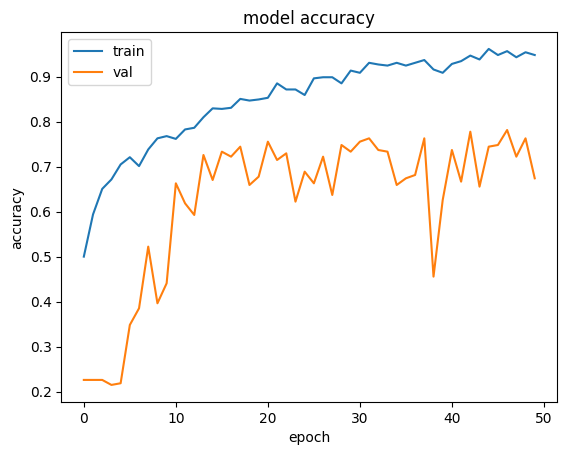

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Checking Results

### Remember the label mapping
- Good : 0
- Defected : 1
- Broken : 2

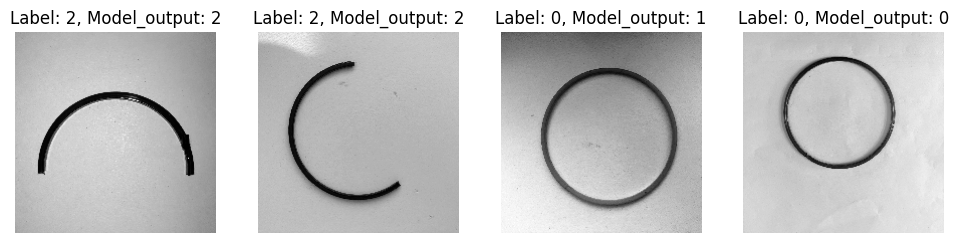

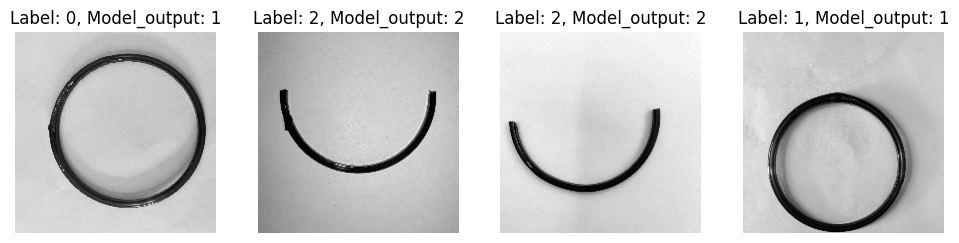

In [15]:
for iteration in range(2):
    plt.figure(figsize=(12, 12))
    for idx, img_idx in enumerate(np.random.permutation(len(all_test_images))[:4]):
        img = all_test_images[img_idx]
        label = all_test_labels[img_idx]
        pred = model.predict(np.array([img]), verbose=0)
        model_output = np.argmax(pred)
        # plotting the image with label and output
        plt.subplot(440 + 1 + idx)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {label}, Model_output: {model_output}')
        plt.axis('off')
    plt.show()

## Checking other metrics on test data

In [16]:
test_pred = model.predict(all_test_images)
test_outputs = [np.argmax(pred) for pred in test_pred]

9/9 [==============================] - 0s 22ms/step


### classification report

In [17]:
print(
    classification_report(all_test_labels,
                      test_outputs,
                      target_names=['Good', 'Defected', 'Broken'],
    )
)

              precision    recall  f1-score   support

        Good       0.88      0.52      0.65       130
    Defected       0.62      0.69      0.65        61
      Broken       0.58      0.92      0.71        79

    accuracy                           0.67       270
   macro avg       0.69      0.71      0.67       270
weighted avg       0.73      0.67      0.67       270



### confusion matrix

In [18]:
confusion_matrix(all_test_labels, test_outputs,)

array([[67, 21, 42],
       [ 8, 42, 11],
       [ 1,  5, 73]])

## Saving Model to GCS

In [19]:
model.save(
    filepath='gs://my-training-artifacts/tf_model/',
    overwrite=True,
)

INFO:tensorflow:Assets written to: gs://my-training-artifacts/tf_model/assets


INFO:tensorflow:Assets written to: gs://my-training-artifacts/tf_model/assets


## Uploading TF model to Model Registry

In [8]:
from google.cloud import aiplatform

### configurations

In [9]:
PROJECT_ID='417812395597'
REGION='us-central1'
ARTIFACT_URI='gs://my-training-artifacts/tf_model/'
MODEL_DISPLAY_NAME='tf-bangle-defect-detector-v1'
SERVING_IMAGE='us-docker.pkg.dev/vertex-ai/prediction/tf2-cpu.2-11:latest'

In [10]:
aiplatform.init(project=PROJECT_ID, location=REGION)
model = aiplatform.Model.upload(
    display_name=MODEL_DISPLAY_NAME,
    artifact_uri=ARTIFACT_URI,
    serving_container_image_uri=SERVING_IMAGE,
    sync=True,
)
model.wait()
print("Model Display Name: ", model.display_name)
print("Model Resource Name: ", model.resource_name)

Creating Model
Create Model backing LRO: projects/417812395597/locations/us-central1/models/3991356951198957568/operations/5718584921233031168
Model created. Resource name: projects/417812395597/locations/us-central1/models/3991356951198957568@1
To use this Model in another session:
model = aiplatform.Model('projects/417812395597/locations/us-central1/models/3991356951198957568@1')
Model Display Name:  tf-bangle-defect-detector-v1
Model Resource Name:  projects/417812395597/locations/us-central1/models/3991356951198957568


## Deploying the TF model to an Endpoint

### We can follow the following three steps to deploy our tensorflow based model as a vertex ai endpoint
- Create an Endpoint
- Retrive the Endpoint ID
- Deploy the model to that Endpoint

### project related configs

In [11]:
ENDPOINT_DISPLAY_NAME='tf-bangle-defect-detector-endpoint'

### Create an Endpoint

In [12]:
def create_vertex_endpoint(
    project_id: str,
    display_name: str,
    location: str,
):
    aiplatform.init(project=project_id, location=location)
    endpoint = aiplatform.Endpoint.create(
        display_name=display_name,
        project=project_id,
        location=location,
    )
    print("Endpoint Display Name: ", endpoint.display_name)
    print("Endpoint Resouce Name: ", endpoint.resource_name)
    return endpoint

In [13]:
vertex_endpoint = create_vertex_endpoint(
    project_id=PROJECT_ID,
    display_name=ENDPOINT_DISPLAY_NAME,
    location=REGION,
)

Creating Endpoint
Create Endpoint backing LRO: projects/417812395597/locations/us-central1/endpoints/4516901519043330048/operations/2460230590830477312
Endpoint created. Resource name: projects/417812395597/locations/us-central1/endpoints/4516901519043330048
To use this Endpoint in another session:
endpoint = aiplatform.Endpoint('projects/417812395597/locations/us-central1/endpoints/4516901519043330048')
Endpoint Display Name:  tf-bangle-defect-detector-endpoint
Endpoint Resouce Name:  projects/417812395597/locations/us-central1/endpoints/4516901519043330048


### Retrieve Endpoint ID for verification

In [14]:
!gcloud ai endpoints list --region={REGION}

Using endpoint [https://us-central1-aiplatform.googleapis.com/]
ENDPOINT_ID          DISPLAY_NAME
4516901519043330048  tf-bangle-defect-detector-endpoint


### Find TF model details from Model Registry

In [15]:
aiplatform.init(project=PROJECT_ID, location=REGION)

In [16]:
## List Model versions
models = aiplatform.Model.list(filter=f"display_name={MODEL_DISPLAY_NAME}")
print("Number of models:", len(models))
print("Version ID:", models[0].version_id)

Number of models: 1
Version ID: 1


### Deploying our TF model to this Endpoint

In [17]:
MODEL = models[0]
DEPLOYED_MODEL_DISPLAY_NAME='tf-bangle-defect-detector-deployed-v1'
MACHINE_TYPE='n1-standard-16'

In [18]:
#Deploy the model to the Vertex AI endpoint
response = vertex_endpoint.deploy(
    model=MODEL,
    deployed_model_display_name=DEPLOYED_MODEL_DISPLAY_NAME,
    machine_type=MACHINE_TYPE,
)

print(vertex_endpoint)

Deploying Model projects/417812395597/locations/us-central1/models/3991356951198957568 to Endpoint : projects/417812395597/locations/us-central1/endpoints/4516901519043330048
Deploy Endpoint model backing LRO: projects/417812395597/locations/us-central1/endpoints/4516901519043330048/operations/7245305194911629312
Endpoint model deployed. Resource name: projects/417812395597/locations/us-central1/endpoints/4516901519043330048
resource name: projects/417812395597/locations/us-central1/endpoints/4516901519043330048


### Check deployed model information

In [19]:
vertex_endpoint.gca_resource.deployed_models[0]

id: "4885783272115666944"
model: "projects/417812395597/locations/us-central1/models/3991356951198957568"
display_name: "tf-bangle-defect-detector-deployed-v1"
create_time {
  seconds: 1694242166
  nanos: 923666000
}
dedicated_resources {
  machine_spec {
    machine_type: "n1-standard-16"
  }
  min_replica_count: 1
  max_replica_count: 1
}
model_version_id: "1"

## Getting predictions from the Endpoint

### preparing input data

- We can send image input data encoded with base64 or as a list of pixel values
- Note that the name of our model's input layer is 'input_1', so it should match the request payload

## let's pick an image from the dataset and preprocess it for the prediction
### We will perform the following steps (should be exactly same as training data preparation)
- reading the image
- converting to grayscale (or black-n-white)
- resizing image to 200x200 resolution as expected by model
- adding channel dimension at the end (as expected by the input layer of our model)
- converting the image array into list
- creating Instances array for prediciton request

In [20]:
image = cv2.imread("dataset/good/img5001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (200, 200))
image = np.expand_dims(image, axis=-1)
image_content = image.astype('float').tolist()

### creating a list of input images for prediction (we only have a single image)
### :Note: - Here 'input_1' is the name of input layer in our model (check model summary).

In [21]:
Instances = [
    {
      "input_1": image_content
    }
]

### setting endpoint configs

- Endpoint ID can be retrieved by querying endpoints using gcloud command or by visiting Google Cloud console UI

In [22]:
ENDPOINT_ID="4516901519043330048"

### Making request to Endpoint

In [23]:
from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value

### creating prediction client object

In [24]:
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)

### preparing json payload for request

In [25]:
instances = [
    json_format.ParseDict(instance_dict, Value()) for instance_dict in Instances
]
parameters_dict = {}
parameters = json_format.ParseDict(parameters_dict, Value())

### sending a prediction request to the endpoint

In [26]:
endpoint = client.endpoint_path(
    project=PROJECT_ID, location=REGION, endpoint=ENDPOINT_ID
)
response = client.predict(
    endpoint=endpoint, instances=instances, parameters=parameters
)
print("response")
print(" deployed_model_id:", response.deployed_model_id)
predictions = response.predictions

response
 deployed_model_id: 7854060046831845376


### Checking the predictions 

In [27]:
predictions

[[0.614086151, 0.216493, 0.169420794]]

## :Note: - Here we see three probability values, one for each class. 
## Probability of class 0 is highest...which means the model is able to recognise it as a "Good Bangle Image"